# Decision Tree

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('once')
pd.options.display.max_columns = None
import os 

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [5]:
sales = pd.read_csv('sales5.csv')
sales.head()

,profit,margin,sales,cogs,total_expenses,marketing,inventory,budget_profit,budget_margin,budget_sales,market_encoding,market_size_encoding,año_encoding,Coffee,Espresso,Herbal Tea,Tea
0,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,160.0,270.0,3,0,0,1,0,0,0
1,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,130.0,210.0,3,0,0,1,0,0,0
2,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,180.0,290.0,3,0,0,1,0,0,0
3,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,160.0,260.0,3,0,0,1,0,0,0
4,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,130.0,210.0,3,0,1,1,0,0,0


Procedemos a realizar el Decission Tree:

In [ ]:
# dividimos los datos de train y test 
X = sales.drop("profit", axis = 1)
y = sales["profit"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# iniciamos el modelo
arbol = DecisionTreeRegressor(random_state =0)
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

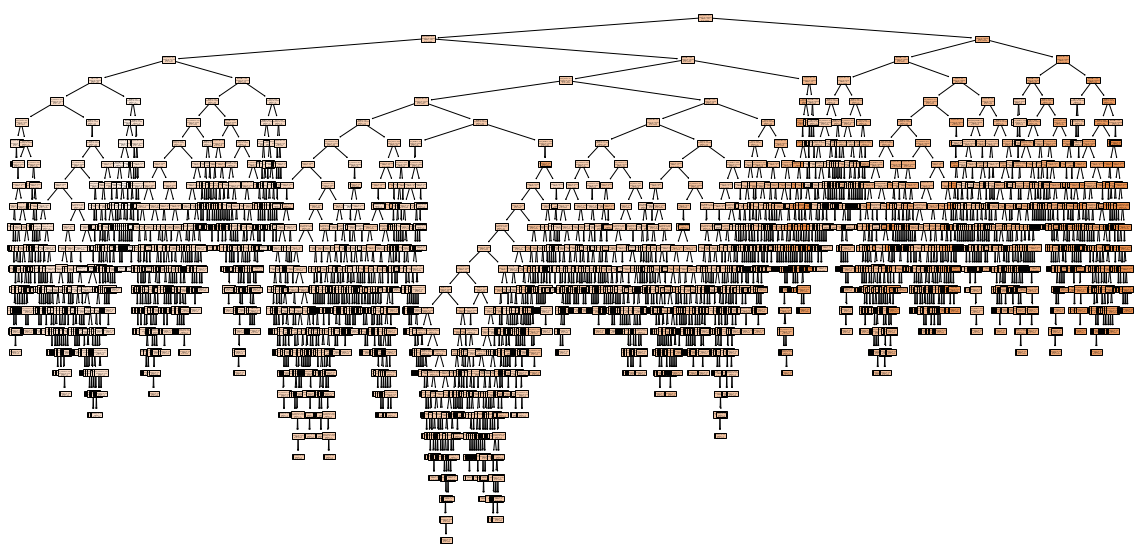

In [ ]:
fig = plt.figure(figsize = (20,10))
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show()

In [ ]:
# conocemos la profundidad máxima que podemos poner en nuestro modelo
max_features = np.sqrt(len(x_train.columns))
max_features

4.0

In [ ]:

print(arbol.tree_.max_depth)

25


Hacemos predicciones para el test y el train:

In [ ]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [ ]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

Llamamos a la función para sacar las métricas:

In [ ]:
dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I Noe y Lola")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,4.392157,300.996601,17.349254,0.864678,test,Decission Tree I Noe y Lola
1,0.107809,8.462968,2.909118,0.996396,train,Decission Tree I Noe y Lola


En nuestro caso, al tener las métricas de train más bajas y r2 más alto,tenemos overfitting. Por lo tanto, produndizamos algo menos (15) y ponemos max_features a 4. Modificamos los parámetros:

In [ ]:
param = {"max_depth": [2,4,8,15], 
        "max_features": [1,2,3,4],
        "min_samples_split": [50,200,400],
        "min_samples_leaf": [25,100,200]} 

Aplicamos GridSearch para ajustar el modelo con los parámetros anteriormente definidos en el diccionario:

In [ ]:
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), 
            param_grid= param, 
            cv=10, 
            verbose=-1, 
            return_train_score = True, 
            scoring="neg_mean_squared_error") 

Ajustamos el modelo:

In [ ]:
gs.fit(x_train, y_train)  

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [25, 100, 200],
                         'min_samples_split': [50, 200, 400]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

Con el método best_estimator_ obtenemos el mejor modelo de todos los que ejecuta y nos devuelve los parámetros con los que lo realiza:

In [ ]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=15, max_features=4, min_samples_leaf=25,
                      min_samples_split=50)

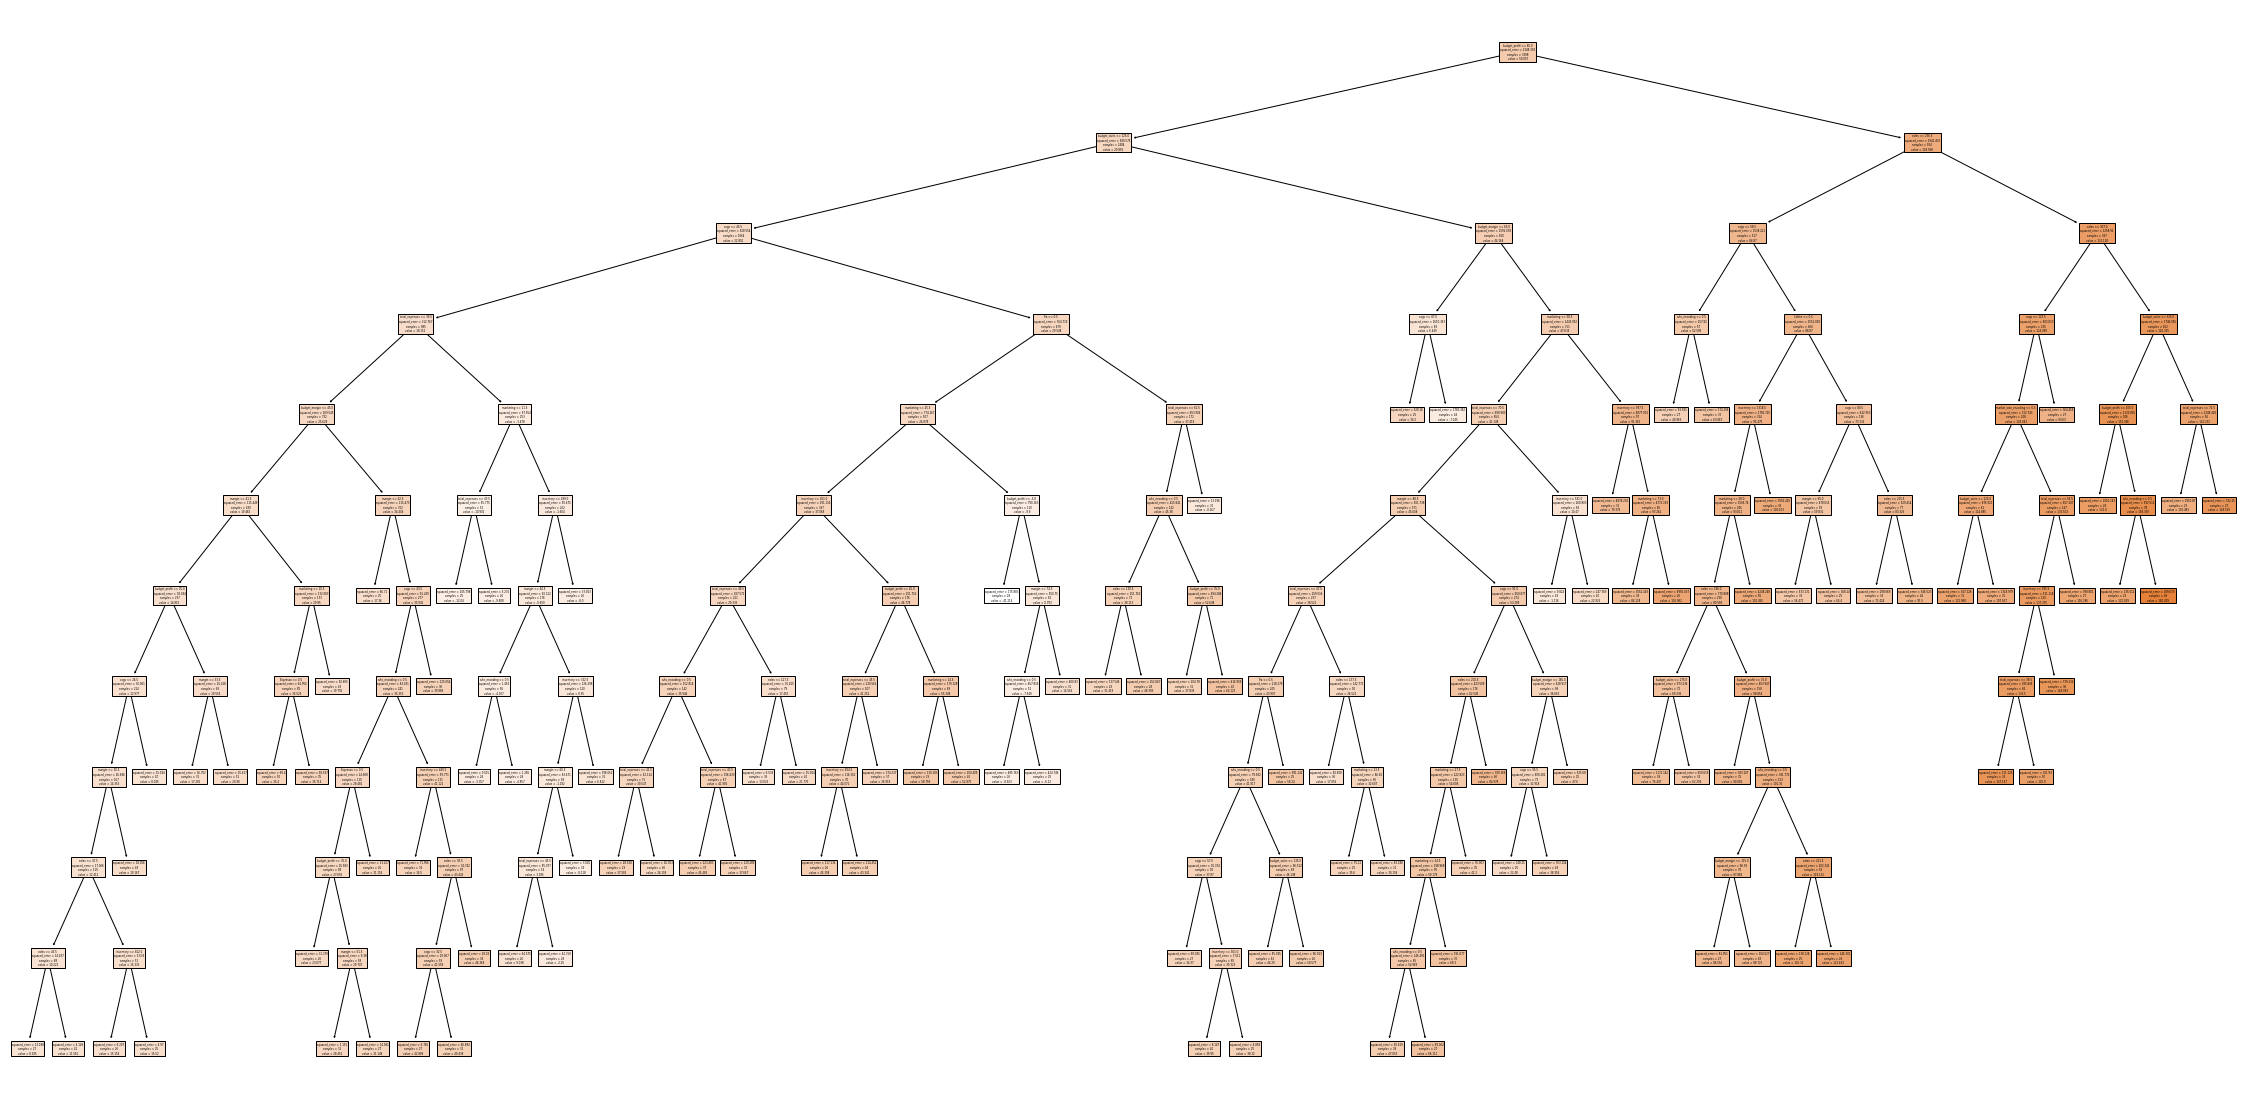

In [ ]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

Calculamos las métricas para saber si es bueno prediciendo o no:


In [ ]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [ ]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II Noe y Lola")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,13.279861,477.144629,21.843640,0.785485,test,Decision tree II Noe y Lola
1,13.036661,484.855083,22.019425,0.793536,train,Decision tree II Noe y Lola


Unimos los dataframes para verlo más claro:

In [ ]:
df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,4.392157,300.996601,17.349254,0.864678,test,Decission Tree I Noe y Lola
1,0.107809,8.462968,2.909118,0.996396,train,Decission Tree I Noe y Lola
0,13.279861,477.144629,21.843640,0.785485,test,Decision tree II Noe y Lola
1,13.036661,484.855083,22.019425,0.793536,train,Decision tree II Noe y Lola


Guardamos las métricas en un csv:

In [ ]:
df_linear_results = pd.read_csv("sales_metricas.csv")
df_linear_results

,MAE,MSE,RMSE,R2,set,modelo
0,14.216182,622.404728,24.948041,0.720179,test,Linear Regresion
1,14.404211,611.506966,24.728667,0.739604,train,LinearRegression


Vamos a unir todos los resultados co la finalidad de poder comparar mejor

In [ ]:
df_DT_LR_results = pd.concat([df_linear_results, df_decision_results], axis = 0)
df_DT_LR_results

,MAE,MSE,RMSE,R2,set,modelo
0,14.216182,622.404728,24.948041,0.720179,test,Linear Regresion
1,14.404211,611.506966,24.728667,0.739604,train,LinearRegression
0,4.392157,300.996601,17.349254,0.864678,test,Decission Tree I Noe y Lola
1,0.107809,8.462968,2.909118,0.996396,train,Decission Tree I Noe y Lola
0,13.279861,477.144629,21.843640,0.785485,test,Decision tree II Noe y Lola
1,13.036661,484.855083,22.019425,0.793536,train,Decision tree II Noe y Lola


Podemos elegir como mejor modelo obtenido el Decission Tree II, ya que ofrece mejor porcentaje de acierto y un RMSE bajo. Guardamos también estos resultados

In [ ]:
df_DT_LR_results.to_csv("resultados_sales_LR_DT.csv")

Extraemos la importancia de cada variable a la hora de determinar el beneficio que vamos a obtener en las ventas de nuestros productos:

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores


Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
6,budget_profit,0.607535
1,sales,0.095370
4,marketing,0.073002
3,total_expenses,0.061350
8,budget_sales,0.045627
2,cogs,0.037385
7,budget_margin,0.023826
11,año_encoding,0.020722
0,margin,0.011943
5,inventory,0.010113


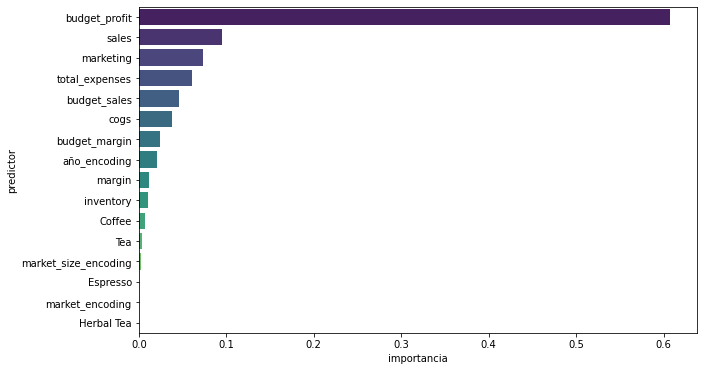

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()



En nuestro caso, la variable más importante a la hora de predecir beneficios es en presupuesto de beneficios, lo que es muy esperable, seguido de las ventas, el marketing y los gastos que generan las ventas. Obeservamos que el tipo de producto no contribuye a la predicción.